# Análisis de regresión: transformación de variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel('data/enigh2020.xlsx', usecols=['ing_cor', 'gasto_mon'])

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ing_cor,2332.0,64911.955167,95889.828287,0.0,29318.0875,46437.730,73357.2875,3305163.92
gasto_mon,2332.0,33401.094983,40101.078904,0.0,16160.2350,24570.735,38219.2200,1007112.49


<Axes: xlabel='ing_cor', ylabel='gasto_mon'>

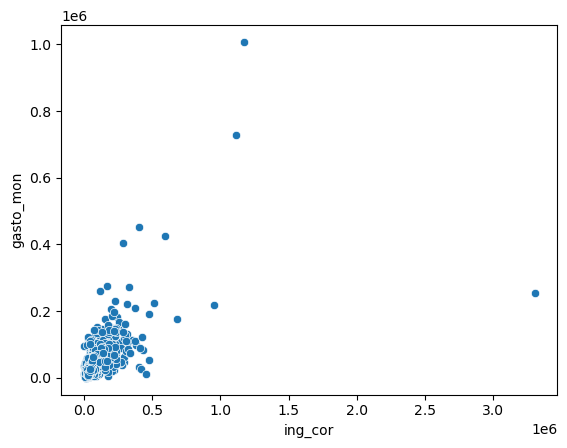

In [4]:
sns.scatterplot(data=df, x='ing_cor', y='gasto_mon')

In [5]:
X = df['ing_cor']
X = sm.add_constant(X)
y = df['gasto_mon']
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              gasto_mon   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1443.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.99e-246
Time:                        19:53:38   Log-Likelihood:                -27464.
No. Observations:                2332   AIC:                         5.493e+04
Df Residuals:                    2330   BIC:                         5.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.661e+04    788.287     21.077      0.0

In [6]:
df = df[(df['ing_cor']>1)&(df['gasto_mon']>1)]

In [7]:
df['ingreso_log'] = np.log(df['ing_cor'])
df['gasto_log'] = np.log(df['gasto_mon'])

<Axes: xlabel='ingreso_log', ylabel='gasto_log'>

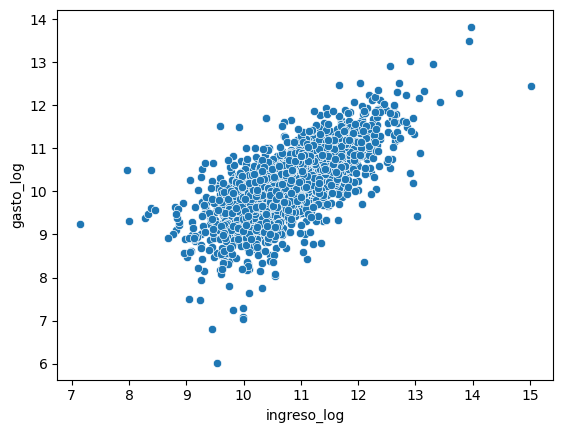

In [8]:
sns.scatterplot(data=df, x='ingreso_log', y='gasto_log')

In [9]:
X = df['ingreso_log']
X = sm.add_constant(X)
y = df['gasto_log']
# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()
# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              gasto_log   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     2071.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:58:19   Log-Likelihood:                -1865.3
No. Observations:                2329   AIC:                             3735.
Df Residuals:                    2327   BIC:                             3746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7514      0.162     16.948      

*Una diferencia entre logaritmos naturales representa un cambio relativo*. Cuando, tanto la variable independiente como la variable dependiente son transformadas con logaritmos:

$\ln(Y) = \beta_0 + \beta_1 \ln(X) + \epsilon$

los coeficientes de la regresión se interpretan como una *elasticidad*, esto es, como el cambio porcentual en y con un cambio porcentual en x.

$\beta_1 = \frac{d(\ln Y)}{d(\ln X)} = \text{Elasticidad} $
